In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import *

In [7]:
STAMP=1 ; LAG=8 ; STEP=24
rec_rmse = pd.read_csv('./output/metric/' + f'rmse_stamp{STAMP}_lag{LAG}_step{STEP}.csv')
# rec_rmse.iloc[:,1]


0      4.679271
1      6.036604
2      7.100224
3      8.073945
4      8.917471
5      9.645483
6     10.265279
7     10.781107
8     11.225933
9     11.601309
10    11.942915
11    12.260879
12    12.533019
13    12.780575
14    13.015883
15    13.221519
16    13.399260
17    13.566826
18    13.721067
19    13.864397
20    13.994751
21    14.110829
22    14.210109
23    14.295722
Name: RMSE, dtype: float64

In [11]:
rec_rmse.columns = ['step','RMSE']
rec_rmse['step'] = rec_rmse['step']+1

In [12]:
rec_rmse

,step,RMSE
0,1,4.679271
1,2,6.036604
2,3,7.100224
3,4,8.073945
4,5,8.917471
5,6,9.645483
6,7,10.265279
7,8,10.781107
8,9,11.225933
9,10,11.601309


Text(0.5, 1.0, 'RMSE of recursive multi-step forecasting')

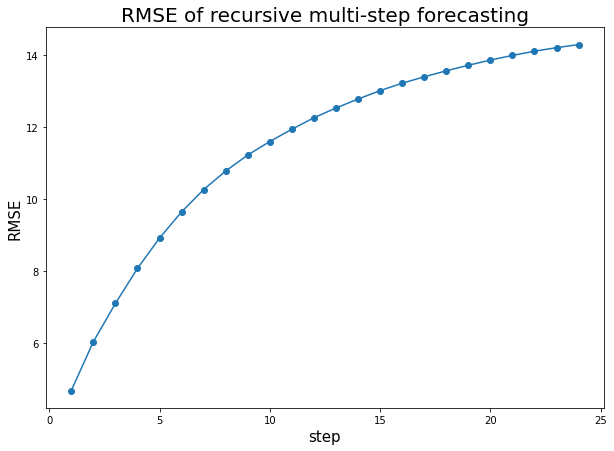

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(rec_rmse['step'], rec_rmse['RMSE'])
plt.plot(rec_rmse['step'], rec_rmse['RMSE'])
plt.xlabel('step', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.title('RMSE of recursive multi-step forecasting', fontsize=20)

# 예측 결과 시각화

## Single-step Forecast

In [24]:
STAMP = 1 ; LAG = 8 ; STEP = 1
gt = pd.read_csv(f'./output/predictions/stamp{STAMP}_lag{LAG}_step{STEP}_gt.csv')
pred = pd.read_csv(f'./output/predictions/stamp{STAMP}_lag{LAG}_step{STEP}_pred.csv')

In [25]:
gt_np = np.array(gt).reshape([len(gt),10,20])
pred_np = np.array(pred).reshape([len(pred),10,20])

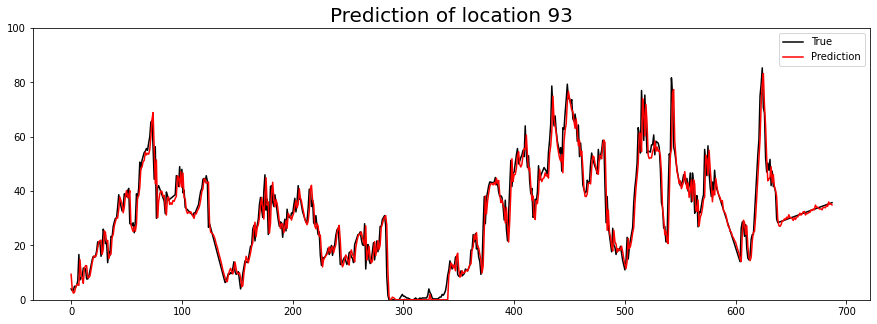

In [31]:
plt.figure(figsize=(15,5))
plt.plot(gt['col_90'], color='black', label='True')
plt.plot(pred['col_90'], color='red', label='Prediction')
plt.title('Prediction of location 93', fontsize=20)
plt.legend(loc='best')
plt.ylim([0,100])
plt.show()

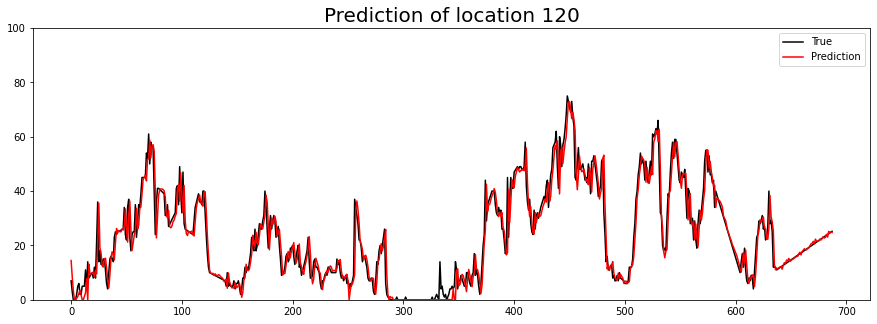

In [27]:
plt.figure(figsize=(15,5))
plt.plot(gt['col_120'], color='black', label='True')
plt.plot(pred['col_120'], color='red', label='Prediction')
plt.title('Prediction of location 120', fontsize=20)
plt.legend(loc='best')
plt.ylim([0,100])
plt.show()

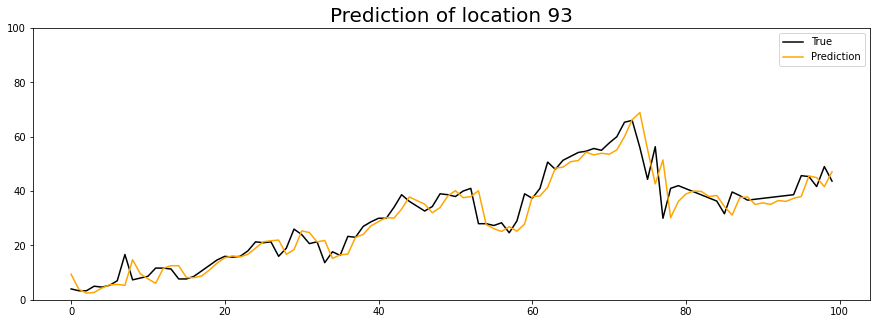

In [28]:
plt.figure(figsize=(15,5))
plt.plot(gt[:100]['col_90'], color='black', label='True')
plt.plot(pred[:100]['col_90'], color='orange', label='Prediction')
plt.title('Prediction of location 93', fontsize=20)
plt.legend(loc='best')
plt.ylim([0,100])
plt.show()

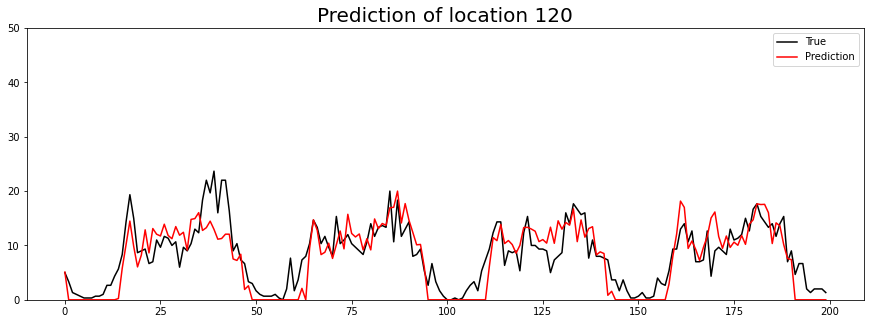

In [36]:
plt.figure(figsize=(15,5))
plt.plot(gt24[:200]['col_120'], color='black', label='True')
plt.plot(pred24[:200]['col_120'], color='red', label='Prediction')
plt.title('Prediction of location 120', fontsize=20)
plt.legend(loc='best')
plt.ylim([0,50])
plt.show()

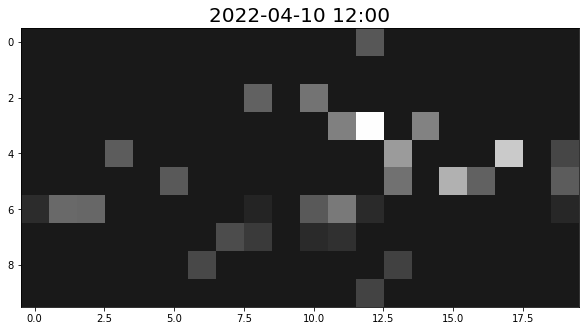

In [34]:
m = 10

target = datetime(2022,4,1,0,0) + timedelta(minutes=30*(m+1))
str(target)

'2022-04-01 05:30:00'

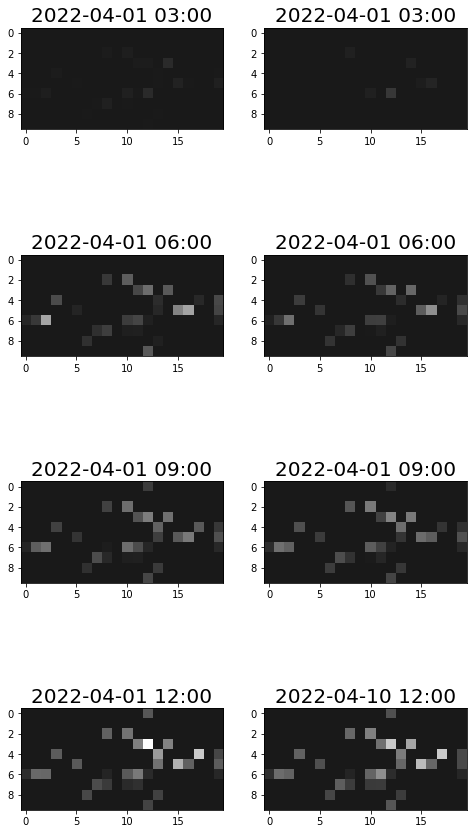

In [24]:
# vmax = train_image[0:48].max() # 252
vmax = 200
c = 20
# idx = 480
idx = 0

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(8,16))

# 2022-04-10 00:00
ax1.imshow(gt_np[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax1.set_title('2022-04-01 03:00', fontsize=20)

ax2.imshow(pred_np[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax2.set_title('2022-04-01 03:00', fontsize=20)

# 2022-04-10 03:00
ax3.imshow(gt_np[idx+6][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax3.set_title('2022-04-01 06:00', fontsize=20)

ax4.imshow(pred_np[idx+6][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax4.set_title('2022-04-01 06:00', fontsize=20)

# 2022-04-10 06:00
ax5.imshow(gt_np[idx+12][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax5.set_title('2022-04-01 09:00', fontsize=20)

ax6.imshow(pred_np[idx+12][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax6.set_title('2022-04-01 09:00', fontsize=20)

# 2022-04-10 09:00
ax7.imshow(gt_np[idx+18][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax7.set_title('2022-04-01 12:00', fontsize=20)

ax8.imshow(pred_np[idx+18][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax8.set_title('2022-04-10 12:00', fontsize=20)

plt.tight_layout()
plt.show()

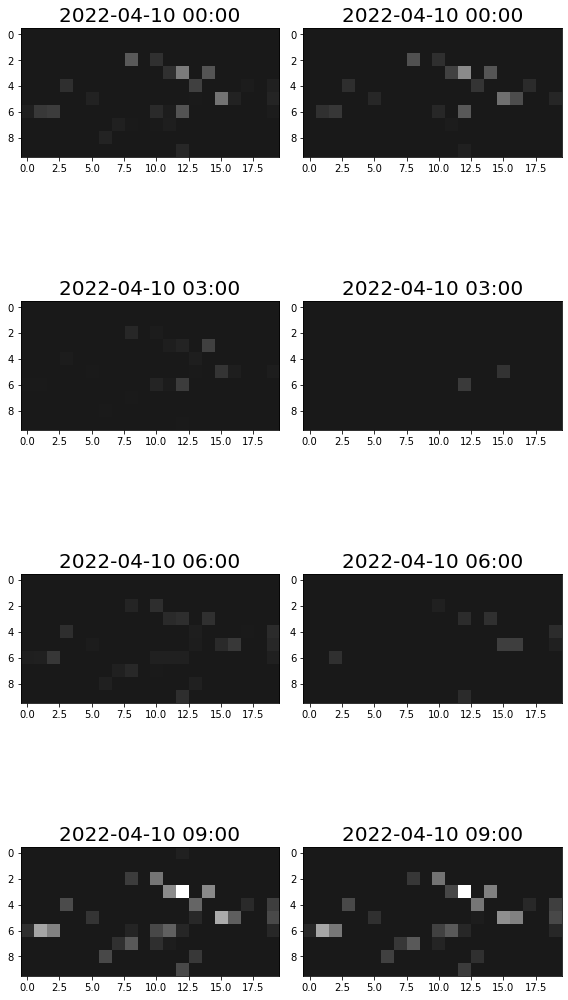

In [115]:
# vmax = train_image[0:48].max() # 252
vmax = 200
c = 20
idx = 480
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(8,16))

# 2022-04-10 00:00
ax1.imshow(gt_np[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax1.set_title('2022-04-10 00:00', fontsize=20)

ax2.imshow(pred_np[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax2.set_title('2022-04-10 00:00', fontsize=20)

# 2022-04-10 03:00
ax3.imshow(gt_np[idx+6][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax3.set_title('2022-04-10 03:00', fontsize=20)

ax4.imshow(pred_np[idx+6][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax4.set_title('2022-04-10 03:00', fontsize=20)

# 2022-04-10 06:00
ax5.imshow(gt_np[idx+12][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax5.set_title('2022-04-10 06:00', fontsize=20)

ax6.imshow(pred_np[idx+12][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax6.set_title('2022-04-10 06:00', fontsize=20)

# 2022-04-10 09:00
ax7.imshow(gt_np[idx+18][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax7.set_title('2022-04-10 09:00', fontsize=20)

ax8.imshow(pred_np[idx+18][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax8.set_title('2022-04-10 09:00', fontsize=20)

plt.tight_layout()
plt.show()

## Multi-step Forecast

In [4]:
table = pd.read_csv('rmse_table_direct1.csv')
table

,Unnamed: 0,Unnamed: 1,Unnamed: 2,lag_2,lag_4,lag_6,lag_8,lag_10,lag_12,lag_14,lag_16,lag_18,lag_20,lag_22,lag_24
0,1,0.5,48,10.192342,9.976743,10.072920,10.318544,9.937923,9.827764,11.012592,10.190362,10.968408,10.653107,9.557562,9.973654
1,2,1.0,24,19.606145,16.552254,15.797243,13.756230,11.802586,10.337066,9.355990,9.288301,9.419541,9.885447,9.997652,9.203067
2,4,2.0,12,17.495299,14.516069,13.512144,11.538530,9.566888,9.413170,9.764364,9.655121,9.719749,9.647999,9.320041,9.604406
3,6,3.0,8,15.935717,13.538563,11.286518,9.976568,10.445527,9.871158,9.702216,9.559644,9.942607,10.358786,9.957551,9.760490
4,8,4.0,6,15.357394,12.391001,12.417648,10.637573,10.278757,10.570240,10.640702,10.511245,10.151826,10.026093,10.217030,10.887350
5,12,6.0,4,24.430368,12.093906,11.902118,10.990395,10.639808,10.925207,10.773181,11.407171,10.500507,10.614504,10.339677,10.668968
6,16,8.0,3,14.880017,11.182364,10.786979,11.344287,11.198007,10.870439,11.561311,10.866403,10.276864,10.221648,10.055191,9.983496
7,24,12.0,2,10.455245,10.845701,11.790697,11.251086,10.374775,10.055577,9.798581,9.636448,8.881473,8.371328,8.605119,8.636845
8,48,24.0,1,9.748609,10.112307,11.299431,9.597441,8.484221,9.065874,8.929446,9.682055,10.007467,10.659803,11.714872,12.514909


In [6]:
table.rename({'Unnamed: 0':'time_stamp', 'Unnamed: 1':'time_unit', 'Unnamed: 2':'step'},
            axis=1, inplace=True)

In [7]:
table

,time_stamp,time_unit,step,lag_2,lag_4,lag_6,lag_8,lag_10,lag_12,lag_14,lag_16,lag_18,lag_20,lag_22,lag_24
0,1,0.5,48,10.192342,9.976743,10.072920,10.318544,9.937923,9.827764,11.012592,10.190362,10.968408,10.653107,9.557562,9.973654
1,2,1.0,24,19.606145,16.552254,15.797243,13.756230,11.802586,10.337066,9.355990,9.288301,9.419541,9.885447,9.997652,9.203067
2,4,2.0,12,17.495299,14.516069,13.512144,11.538530,9.566888,9.413170,9.764364,9.655121,9.719749,9.647999,9.320041,9.604406
3,6,3.0,8,15.935717,13.538563,11.286518,9.976568,10.445527,9.871158,9.702216,9.559644,9.942607,10.358786,9.957551,9.760490
4,8,4.0,6,15.357394,12.391001,12.417648,10.637573,10.278757,10.570240,10.640702,10.511245,10.151826,10.026093,10.217030,10.887350
5,12,6.0,4,24.430368,12.093906,11.902118,10.990395,10.639808,10.925207,10.773181,11.407171,10.500507,10.614504,10.339677,10.668968
6,16,8.0,3,14.880017,11.182364,10.786979,11.344287,11.198007,10.870439,11.561311,10.866403,10.276864,10.221648,10.055191,9.983496
7,24,12.0,2,10.455245,10.845701,11.790697,11.251086,10.374775,10.055577,9.798581,9.636448,8.881473,8.371328,8.605119,8.636845
8,48,24.0,1,9.748609,10.112307,11.299431,9.597441,8.484221,9.065874,8.929446,9.682055,10.007467,10.659803,11.714872,12.514909


In [10]:
table2 = table.T
table2.columns = [f'time_stamp_{i}' for i in table['time_stamp']]

In [17]:
table2 = table2.iloc[3:,:]

In [18]:
table2

,time_stamp_1,time_stamp_2,time_stamp_4,time_stamp_6,time_stamp_8,time_stamp_12,time_stamp_16,time_stamp_24,time_stamp_48
lag_2,10.192342,19.606145,17.495299,15.935717,15.357394,24.430368,14.880017,10.455245,9.748609
lag_4,9.976743,16.552254,14.516069,13.538563,12.391001,12.093906,11.182364,10.845701,10.112307
lag_6,10.072920,15.797243,13.512144,11.286518,12.417648,11.902118,10.786979,11.790697,11.299431
lag_8,10.318544,13.756230,11.538530,9.976568,10.637573,10.990395,11.344287,11.251086,9.597441
lag_10,9.937923,11.802586,9.566888,10.445527,10.278757,10.639808,11.198007,10.374775,8.484221
lag_12,9.827764,10.337066,9.413170,9.871158,10.570240,10.925207,10.870439,10.055577,9.065874
lag_14,11.012592,9.355990,9.764364,9.702216,10.640702,10.773181,11.561311,9.798581,8.929446
lag_16,10.190362,9.288301,9.655121,9.559644,10.511245,11.407171,10.866403,9.636448,9.682055
lag_18,10.968408,9.419541,9.719749,9.942607,10.151826,10.500507,10.276864,8.881473,10.007467
lag_20,10.653107,9.885447,9.647999,10.358786,10.026093,10.614504,10.221648,8.371328,10.659803


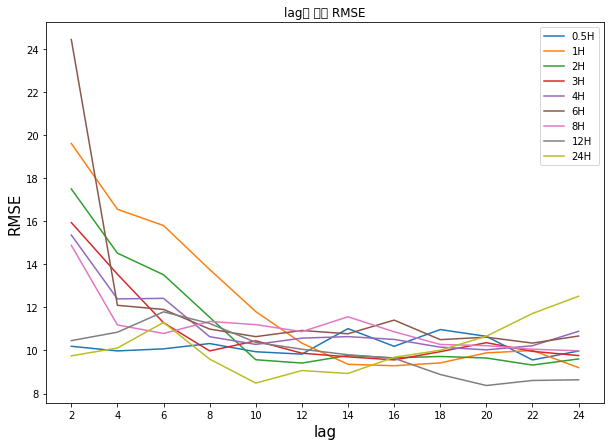

In [49]:
x_range = range(2,26,2) 
plt.figure(figsize=(10,7))
plt.plot(x_range, table2['time_stamp_1'], label='0.5H')
plt.plot(x_range, table2['time_stamp_2'], label='1H')
plt.plot(x_range, table2['time_stamp_4'], label='2H')
plt.plot(x_range, table2['time_stamp_6'], label='3H')
plt.plot(x_range, table2['time_stamp_8'], label='4H')
plt.plot(x_range, table2['time_stamp_12'], label='6H')
plt.plot(x_range, table2['time_stamp_16'], label='8H')
plt.plot(x_range, table2['time_stamp_24'], label='12H')
plt.plot(x_range, table2['time_stamp_48'], label='24H')
plt.xticks(x_range)
plt.xlabel('lag', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.title('lag에 따른 RMSE')
plt.legend()
plt.show()